In [43]:
import pandas as pd
import numpy as np
from google.colab import drive
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

drive.mount('/content/drive')

Mounted at /content/drive


In [44]:
df =pd.read_csv('/content/drive/MyDrive/lending_club/loan.csv')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [46]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,...,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,...,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,...,11749.0,13800.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,...,36151.0,5000.0,44984.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,...,29674.0,9300.0,32332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df['issue_d'].value_counts(dropna=False)

,count
issue_d,
Mar-2016,61992
Oct-2015,48631
May-2018,46311
Oct-2018,46305
Aug-2018,46079
...,...
Aug-2007,74
Jul-2007,63
Sep-2008,57


In [48]:
df['loan_status'].value_counts(dropna=False)

,count
loan_status,
Fully Paid,1041952
Current,919695
Charged Off,261655
Late (31-120 days),21897
In Grace Period,8952
Late (16-30 days),3737
Does not meet the credit policy. Status:Fully Paid,1988
Does not meet the credit policy. Status:Charged Off,761
Default,31


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Columns: 145 entries, id to settlement_term
dtypes: float64(105), int64(4), object(36)
memory usage: 2.4+ GB


In [50]:
df.shape

(2260668, 145)

In [51]:
missing_fractions = df.isnull().mean().sort_values(ascending=False)

In [52]:
missing_fractions.head(30)

,0
id,1.000000
member_id,1.000000
url,1.000000
orig_projected_additional_accrued_interest,0.996273
hardship_amount,0.995305
hardship_dpd,0.995305
hardship_loan_status,0.995305
deferral_term,0.995305
hardship_end_date,0.995305
hardship_status,0.995305


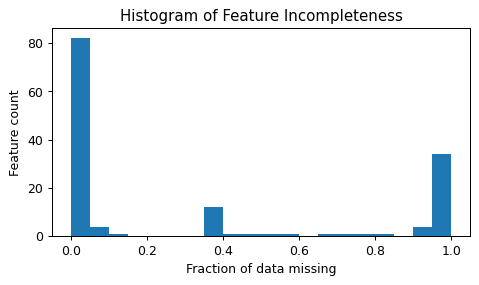

In [53]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')
plt.show()

In [54]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.30].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'id', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_mths_since_last_major_derog', 'sec_app_num_rev_accts', 'sec_app_o

In [55]:
len(drop_list)

58

In [56]:
df_droped=df
df_droped.drop(axis=1,labels=drop_list,inplace=True)

In [57]:
df_droped.shape

(2260668, 87)

In [58]:
print(sorted(df_droped.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open

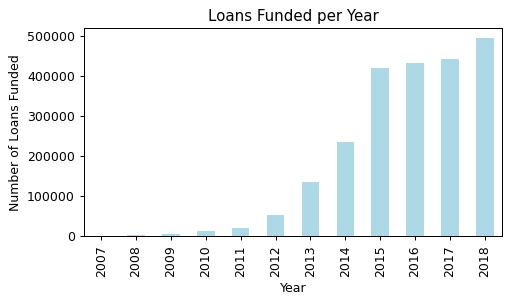

In [59]:
plt.figure(figsize=(6,3), dpi=90)
df_droped['issue_d'] = pd.to_datetime(df_droped['issue_d'])
df_droped['issue_d'].dt.year.value_counts().sort_index().plot.bar(color='lightblue')
plt.xlabel('Year')
plt.ylabel('Number of Loans Funded')
plt.title('Loans Funded per Year')
plt.show()

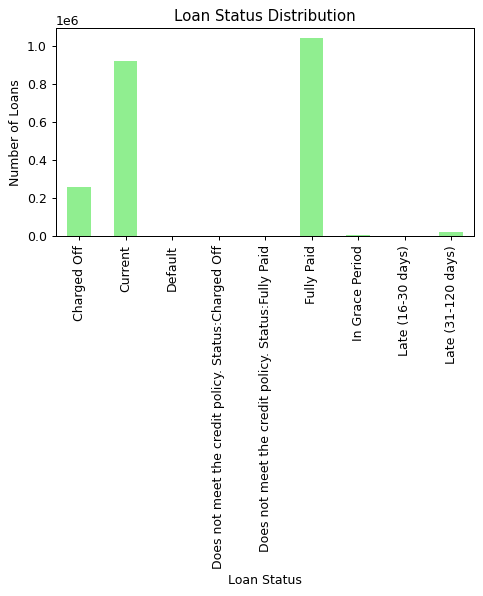

In [60]:
plt.figure(figsize=(6,3), dpi=90)
df_droped['loan_status'].value_counts().sort_index().plot.bar(color='lightgreen')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Loan Status Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

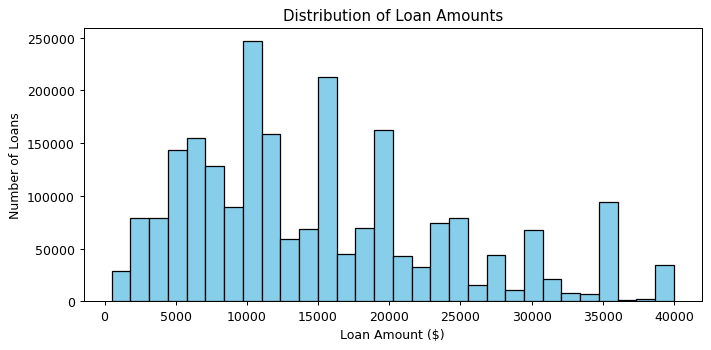

In [61]:
plt.figure(figsize=(8,4), dpi=90)
plt.hist(df_droped['loan_amnt'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Amounts')
plt.tight_layout()
plt.show()

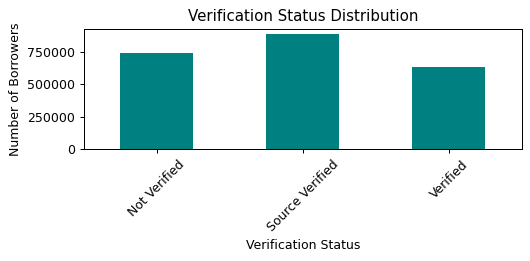

In [62]:
plt.figure(figsize=(6,3), dpi=90)
df_droped['verification_status'].value_counts().sort_index().plot.bar(color='teal')
plt.xlabel('Verification Status')
plt.ylabel('Number of Borrowers')
plt.title('Verification Status Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [63]:
df_droped.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,...,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,...,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,2.0,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,...,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,4.0,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,0.0,...,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,14.0,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,0.0,...,30505.0,1239.0,75.2,0.0,0.0,62.0,154.0,64.0,5.0,3.0,64.0,5.0,0.0,1.0,2.0,1.0,2.0,7.0,2.0,3.0,2.0,10.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,2018-12-01,Current,n,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,0.0,...,9667.0,8471.0,8.9,0.0,0.0,53.0,216.0,2.0,2.0,2.0,2.0,13.0,0.0,2.0,2.0,3.0,8.0,9.0,6.0,15.0,2.0,12.0,0.0,0.0,0.0,5.0,92.3,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [64]:
keep_list = [ 'loan_status','annual_inc', 'dti', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership',  'installment', 'int_rate', 'loan_amnt',  'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',  'revol_bal', 'revol_util', 'sub_grade', 'total_acc', 'verification_status']

In [65]:
len(keep_list)

19

In [66]:
drop_list = [col for col in df_droped.columns if col not in keep_list]
print(drop_list)

['funded_amnt', 'funded_amnt_inv', 'term', 'emp_title', 'emp_length', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_

In [67]:
len(drop_list)

70

In [68]:
df_droped.drop(axis=1,labels=drop_list,inplace=True)

In [69]:
df_droped

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,2500,13.56,84.92,C,C1,RENT,55000.0,Not Verified,Current,18.24,9.0,1.0,4341,10.3,34.0,0.0,1.0
1,30000,18.94,777.23,D,D2,MORTGAGE,90000.0,Source Verified,Current,26.52,13.0,1.0,12315,24.2,44.0,3.0,1.0
2,5000,17.97,180.69,D,D1,MORTGAGE,59280.0,Source Verified,Current,10.51,8.0,0.0,4599,19.1,13.0,2.0,0.0
3,4000,18.94,146.51,D,D2,MORTGAGE,92000.0,Source Verified,Current,16.74,10.0,0.0,5468,78.1,13.0,3.0,0.0
4,30000,16.14,731.78,C,C4,MORTGAGE,57250.0,Not Verified,Current,26.35,12.0,0.0,829,3.6,26.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,14.08,279.72,C,C3,MORTGAGE,58000.0,Not Verified,Current,20.88,12.0,0.0,9592,39.2,34.0,2.0,0.0
2260664,12000,25.82,358.01,E,E4,MORTGAGE,30000.0,Not Verified,Fully Paid,19.28,10.0,0.0,3497,20.2,26.0,4.0,0.0
2260665,10000,11.99,332.10,B,B5,OWN,64000.0,Source Verified,Current,12.96,6.0,0.0,7094,70.9,13.0,3.0,0.0
2260666,12000,21.45,327.69,D,D5,RENT,60000.0,Not Verified,Current,30.82,8.0,0.0,12927,34.9,17.0,0.0,0.0


In [70]:
df_droped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             int64  
 1   int_rate              float64
 2   installment           float64
 3   grade                 object 
 4   sub_grade             object 
 5   home_ownership        object 
 6   annual_inc            float64
 7   verification_status   object 
 8   loan_status           object 
 9   dti                   float64
 10  open_acc              float64
 11  pub_rec               float64
 12  revol_bal             int64  
 13  revol_util            float64
 14  total_acc             float64
 15  mort_acc              float64
 16  pub_rec_bankruptcies  float64
dtypes: float64(10), int64(2), object(5)
memory usage: 293.2+ MB


In [71]:
def df_object_to_num(df_dropped):
    df_num = df_dropped.copy()
    col_drop_list = ['emp_title']
    df_num['mort_acc'] = np.where(df_num['mort_acc'].isnull(), 0,df_num['mort_acc'])
    df_num['pub_rec_bankruptcies'] = np.where(df_num['pub_rec_bankruptcies']>0, 1, 0)
    df_num['pub_rec'] = np.where(df_num['pub_rec']>0, 1, 0)
    term_to_int = {' 36 months': 1,
                   ' 60 months': 2}
    grade_to_int = dict(zip(['A', 'B', 'C', 'D', 'E', 'F', 'G'], np.arange(7, 0, -1)))
    sub_grade_sorted = {'G5': 0, 'G4': 1, 'G3': 2, 'G2': 3, 'G1': 4,
                        'F5': 5, 'F4': 6, 'F3': 7, 'F2': 8, 'F1': 9,
                        'E5': 10, 'E4': 11, 'E3': 12, 'E2': 13, 'E1': 14,
                        'D5': 15, 'D4': 16, 'D3': 17, 'D2': 18, 'D1': 19,
                        'C5': 20, 'C4': 21, 'C3': 22, 'C2': 23, 'C1': 24,
                        'B5': 25, 'B4': 26, 'B3': 27, 'B2': 28, 'B1': 29,
                        'A5': 30, 'A4': 31, 'A3': 32, 'A2': 33, 'A1': 34}
    home_to_int = {'MORTGAGE': 4, 'RENT': 3, 'OWN': 5,'ANY': 2,'OTHER': 1, 'NONE':0 }
    ver_stat_to_int = {'Source Verified':2,'Verified': 1,'Not Verified': 0}
    loan_status_to_int={'Fully Paid':0,'Current' :0,'Charged Off':1,'Late (31-120 days)':1,'In Grace Period':0,
                        'Late (16-30 days)':1,'Does not meet the credit policy. Status:Fully Paid':0,
                        'Does not meet the credit policy. Status:Charged Off':1,'Default':1    }
    df_num['verification_status'] = np.where(df_num['verification_status'].isnull(), 'Not Verified',df_num['verification_status'])
    df_num.replace({'term': term_to_int,
                    'grade':grade_to_int,
                    'sub_grade': sub_grade_sorted,
                    'home_ownership':home_to_int,
                    'verification_status':ver_stat_to_int,
                   'verification_status_joint':ver_stat_to_int,
                   'loan_status':loan_status_to_int}, inplace=True)
    return df_num

In [72]:
df_new = df_object_to_num(df_droped)
df_new.head()
df_new['loan_status'].value_counts(dropna=False)

,count
loan_status,
0,1972587
1,288081


In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             int64  
 1   int_rate              float64
 2   installment           float64
 3   grade                 int64  
 4   sub_grade             int64  
 5   home_ownership        int64  
 6   annual_inc            float64
 7   verification_status   int64  
 8   loan_status           int64  
 9   dti                   float64
 10  open_acc              float64
 11  pub_rec               int64  
 12  revol_bal             int64  
 13  revol_util            float64
 14  total_acc             float64
 15  mort_acc              float64
 16  pub_rec_bankruptcies  int64  
dtypes: float64(8), int64(9)
memory usage: 293.2 MB


In [74]:
df_new

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,2500,13.56,84.92,5,24,3,55000.0,0,0,18.24,9.0,1,4341,10.3,34.0,0.0,1
1,30000,18.94,777.23,4,18,4,90000.0,2,0,26.52,13.0,1,12315,24.2,44.0,3.0,1
2,5000,17.97,180.69,4,19,4,59280.0,2,0,10.51,8.0,0,4599,19.1,13.0,2.0,0
3,4000,18.94,146.51,4,18,4,92000.0,2,0,16.74,10.0,0,5468,78.1,13.0,3.0,0
4,30000,16.14,731.78,5,21,4,57250.0,0,0,26.35,12.0,0,829,3.6,26.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260663,12000,14.08,279.72,5,22,4,58000.0,0,0,20.88,12.0,0,9592,39.2,34.0,2.0,0
2260664,12000,25.82,358.01,3,11,4,30000.0,0,0,19.28,10.0,0,3497,20.2,26.0,4.0,0
2260665,10000,11.99,332.10,6,25,5,64000.0,2,0,12.96,6.0,0,7094,70.9,13.0,3.0,0
2260666,12000,21.45,327.69,4,15,3,60000.0,0,0,30.82,8.0,0,12927,34.9,17.0,0.0,0


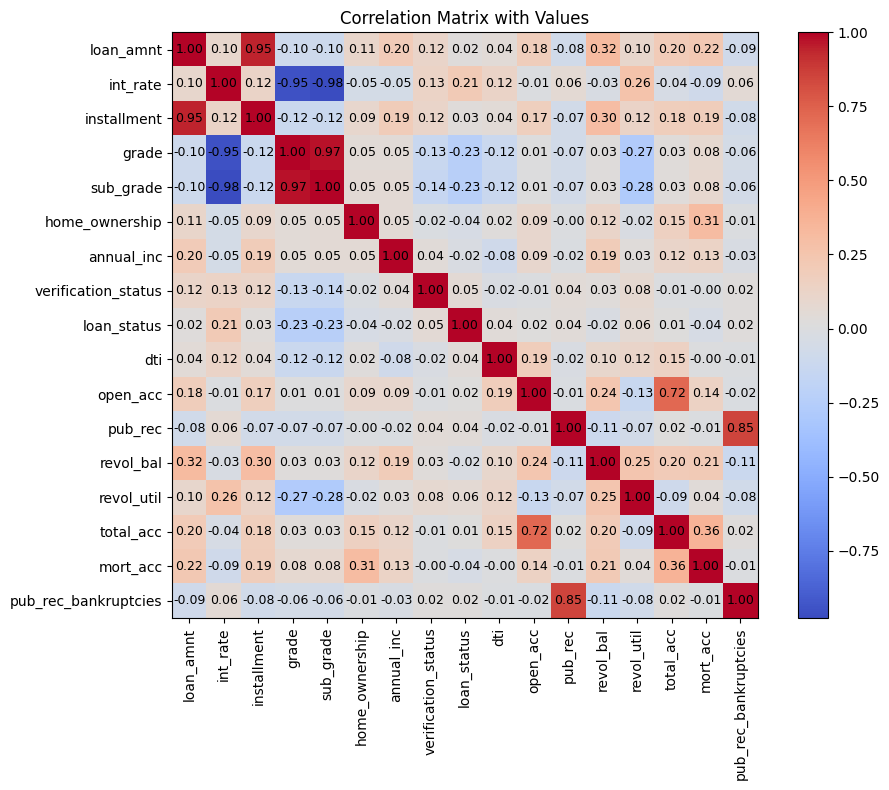

In [75]:
corr = df_new.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.imshow(corr, interpolation='nearest', cmap='coolwarm')
plt.colorbar()

plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)

for i in range(len(corr)):
    for j in range(len(corr)):
        value = corr.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', fontsize=9, color='black')

plt.title("Correlation Matrix with Values")
plt.tight_layout()
plt.show()

In [76]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

numeric_cols = [col for col in df_new.columns if pd.api.types.is_numeric_dtype(df_new[col])]

scaler = RobustScaler()
df_new[numeric_cols] = scaler.fit_transform(df_new[numeric_cols])

df_new.head()

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,-0.866667,0.144615,-0.857757,0.0,0.000,-1.0,-0.212766,-0.5,0.0,0.031746,-0.333333,1.0,-0.488458,-1.055409,0.7500,-0.5,1.0
1,1.425000,0.972308,1.168496,-1.0,-0.750,0.0,0.531915,0.5,0.0,0.688889,0.333333,1.0,0.069320,-0.688654,1.3750,1.0,1.0
2,-0.658333,0.823077,-0.577458,-1.0,-0.625,0.0,-0.121702,0.5,0.0,-0.581746,-0.500000,0.0,-0.470411,-0.823219,-0.5625,0.5,0.0
3,-0.741667,0.972308,-0.677496,-1.0,-0.750,0.0,0.574468,0.5,0.0,-0.087302,-0.166667,0.0,-0.409625,0.733509,-0.5625,1.0,0.0
4,1.425000,0.541538,1.035473,0.0,-0.375,0.0,-0.164894,-0.5,0.0,0.675397,0.166667,0.0,-0.734121,-1.232190,0.2500,0.5,0.0


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df_new = df_new.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new) // n_chunks

df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    class_counts = y.value_counts()
    single_sample_classes = class_counts[class_counts == 1].index

    if len(single_sample_classes) > 0:
        mask = ~y.isin(single_sample_classes)
        X = X[mask]
        y = y[mask]
        print(f"  Removed {len(single_sample_classes)} classes with only one member from Chunk {i+1} for stratification.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452136 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8731
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78964
         1.0       0.47      0.01      0.02     11463

    accuracy                           0.87     90427
   macro avg       0.67      0.50      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8735
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     79015
         1.0       0.46      0.01      0.02     11412

    accuracy                           0.87     90427
   macro avg       0.67      0.50      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8723
Classification Report:
          

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

df_new = df_new.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new) // n_chunks

df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452136 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8734
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78995
         1.0       0.47      0.01      0.02     11432

    accuracy                           0.87     90427
   macro avg       0.67      0.50      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8721
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78869
         1.0       0.49      0.01      0.03     11558

    accuracy                           0.87     90427
   macro avg       0.68      0.51      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8728
Classification Report:
          

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

df_new = df_new.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new) // n_chunks

df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    class_counts = y.value_counts()
    single_sample_classes = class_counts[class_counts == 1].index

    if len(single_sample_classes) > 0:
        mask = ~y.isin(single_sample_classes)
        X = X[mask]
        y = y[mask]
        print(f"  Removed {len(single_sample_classes)} classes with only one member from Chunk {i+1} for stratification.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452136 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8724
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78952
         1.0       0.41      0.01      0.02     11475

    accuracy                           0.87     90427
   macro avg       0.64      0.50      0.48     90427
weighted avg       0.82      0.87      0.82     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8715
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78828
         1.0       0.47      0.01      0.03     11599

    accuracy                           0.87     90427
   macro avg       0.67      0.51      0.48     90427
weighted avg       0.82      0.87      0.81     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8721
Classification Report:
          

The `dropna()` method removes rows or columns with missing values (NaNs). By default, it removes rows (`axis=0`) where *any* column has a NaN value (`how='any'`).

If you want to fill NaN values instead of removing them, you can use `fillna()` with a specified value or a statistical measure like the mean or median. Let me know if you'd prefer to see that option!

In [80]:
df_new_cleaned = df_new.dropna()
display(df_new_cleaned.head())
print(f"Original DataFrame shape: {df_new.shape}")
print(f"Cleaned DataFrame shape: {df_new_cleaned.shape}")

,loan_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,0.285417,0.518462,0.573272,-1.0,-0.750,1.0,-0.553191,0.5,1.0,1.736508,0.666667,0.0,-0.150951,0.329815,0.4375,-0.5,0.0
1,-0.825000,0.969231,-0.784792,-1.0,-1.000,-1.0,-0.872340,0.0,0.0,0.143651,-0.666667,0.0,-0.587927,0.506596,-0.3750,-0.5,0.0
2,-0.491667,0.018462,-0.418533,0.0,0.000,-1.0,-0.744681,0.5,0.0,-0.761905,1.166667,0.0,-0.354435,0.274406,0.0625,-0.5,0.0
3,0.591667,0.287692,0.908303,0.0,-0.375,-1.0,0.106383,0.0,0.0,0.611111,2.500000,0.0,0.789102,-0.530343,0.7500,0.0,0.0
4,0.972917,-0.572308,1.177598,2.0,0.750,-1.0,-0.212766,0.5,0.0,0.465873,0.666667,0.0,2.829673,0.277045,0.4375,0.0,0.0


Original DataFrame shape: (2260668, 17)
Cleaned DataFrame shape: (2257159, 17)


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

df_new_cleaned= df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)

n_chunks = 5
chunk_size = len(df_new_cleaned) // n_chunks

df_chunks = [df_new_cleaned.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new_cleaned) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new_cleaned.iloc[n_chunks*chunk_size:]], axis=0)

for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")

target_col = "loan_status"

for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")

    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]

    class_counts = y.value_counts()
    single_sample_classes = class_counts[class_counts == 1].index

    if len(single_sample_classes) > 0:
        mask = ~y.isin(single_sample_classes)
        X = X[mask]
        y = y[mask]
        print(f"  Removed {len(single_sample_classes)} classes with only one member from Chunk {i+1} for stratification.")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )

    rf = RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        class_weight="balanced"
    )

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Chunk 1: 451431 rows
Chunk 2: 451431 rows
Chunk 3: 451431 rows
Chunk 4: 451431 rows
Chunk 5: 451435 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8719
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78737
         1.0       0.48      0.01      0.02     11550

    accuracy                           0.87     90287
   macro avg       0.67      0.51      0.48     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8732
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78870
         1.0       0.45      0.01      0.02     11417

    accuracy                           0.87     90287
   macro avg       0.66      0.51      0.48     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8721
Classification Report:
          

In [82]:
df_new_cleaned = df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)
n_chunks = 5
chunk_size = len(df_new) // n_chunks
df_chunks = [df_new.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df_new) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df_new_cleaned.iloc[n_chunks*chunk_size:]], axis=0)
for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")
target_col = "loan_status"
chunk_accuracies = []
all_y_test = []
all_y_pred = []
for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")
    for col in chunk.select_dtypes(include=np.number).columns:
        if chunk[col].isnull().any():
            median_val = chunk[col].median()
            chunk[col].fillna(median_val, inplace=True)
    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    lr = LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=-1,
        random_state=13
    )
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    chunk_accuracies.append(acc)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)
for idx, acc in enumerate(chunk_accuracies):
    print(f"Chunk {idx+1} Test Accuracy: {acc:.4f}")
overall_acc = accuracy_score(all_y_test, all_y_pred)
print(f"\n=== Overall Accuracy on all chunks combined: {overall_acc:.4f} ===")

Chunk 1: 452133 rows
Chunk 2: 452133 rows
Chunk 3: 452133 rows
Chunk 4: 452133 rows
Chunk 5: 452133 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.6533
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77     78952
         1.0       0.21      0.64      0.32     11475

    accuracy                           0.65     90427
   macro avg       0.57      0.65      0.54     90427
weighted avg       0.84      0.65      0.71     90427


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.6565
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.66      0.77     78828
         1.0       0.22      0.65      0.33     11599

    accuracy                           0.66     90427
   macro avg       0.57      0.65      0.55     90427
weighted avg       0.84      0.66      0.71     90427


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.6561
Classification Report:
          

In [83]:
df = df_new_cleaned.sample(frac=1, random_state=13).reset_index(drop=True)
n_chunks = 5
chunk_size = len(df) // n_chunks
df_chunks = [df.iloc[i*chunk_size : (i+1)*chunk_size] for i in range(n_chunks)]
if len(df) % n_chunks != 0:
    df_chunks[-1] = pd.concat([df_chunks[-1], df.iloc[n_chunks*chunk_size:]], axis=0)
for i, chunk in enumerate(df_chunks):
    print(f"Chunk {i+1}: {len(chunk)} rows")
target_col = "loan_status"
chunk_accuracies = []
all_y_test = []
all_y_pred = []
for i, chunk in enumerate(df_chunks):
    print(f"\n=== Training on Chunk {i+1} ===")
    num_cols = chunk.select_dtypes(include=np.number).columns
    for col in num_cols:
        if chunk[col].isnull().any():
            chunk[col] = chunk[col].fillna(chunk[col].median())
    X = chunk.drop(target_col, axis=1)
    y = chunk[target_col]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=13, stratify=y
    )
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    xgb = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="binary:logistic",
        eval_metric="logloss",
        scale_pos_weight=1,
        random_state=13,
        n_jobs=-1
    )
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    chunk_accuracies.append(acc)
    print(f"Chunk {i+1} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)
print("\n=== Chunk Accuracies ===")
for idx, acc in enumerate(chunk_accuracies):
    print(f"Chunk {idx+1}: {acc:.4f}")
overall_acc = accuracy_score(all_y_test, all_y_pred)
print(f"\n=== Overall Accuracy Across All Chunks: {overall_acc:.4f} ===")

Chunk 1: 451431 rows
Chunk 2: 451431 rows
Chunk 3: 451431 rows
Chunk 4: 451431 rows
Chunk 5: 451435 rows

=== Training on Chunk 1 ===
Chunk 1 Accuracy: 0.8729
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78821
         1.0       0.49      0.01      0.02     11466

    accuracy                           0.87     90287
   macro avg       0.68      0.50      0.48     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 2 ===
Chunk 2 Accuracy: 0.8726
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     78786
         1.0       0.49      0.01      0.02     11501

    accuracy                           0.87     90287
   macro avg       0.68      0.50      0.47     90287
weighted avg       0.82      0.87      0.82     90287


=== Training on Chunk 3 ===
Chunk 3 Accuracy: 0.8722
              precision    recall  f1-score   support

         0.0       0.87 

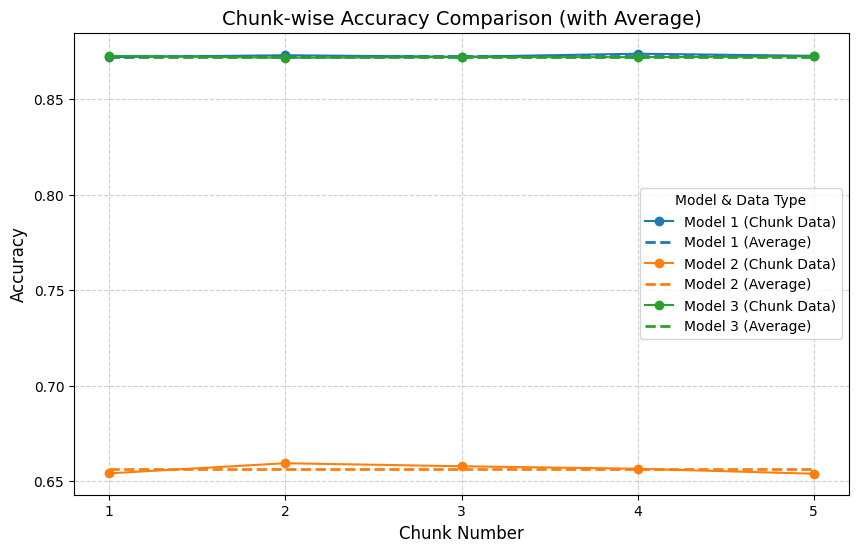

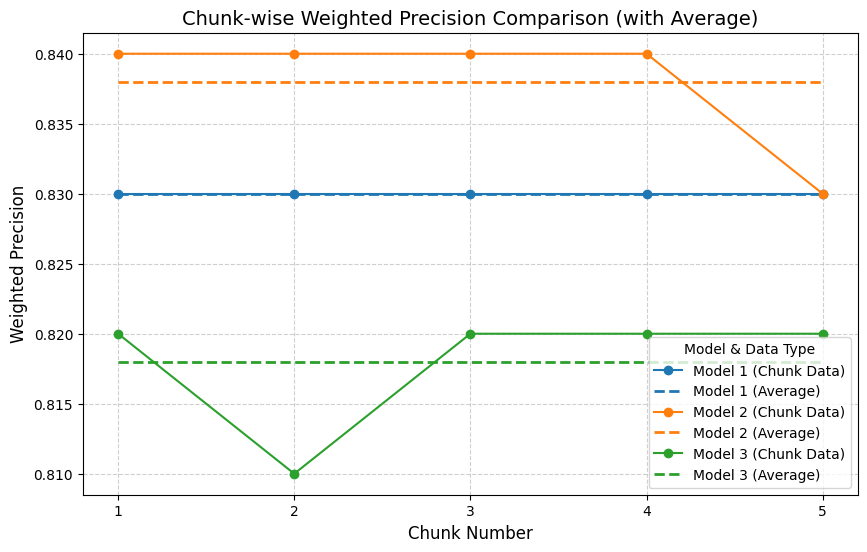

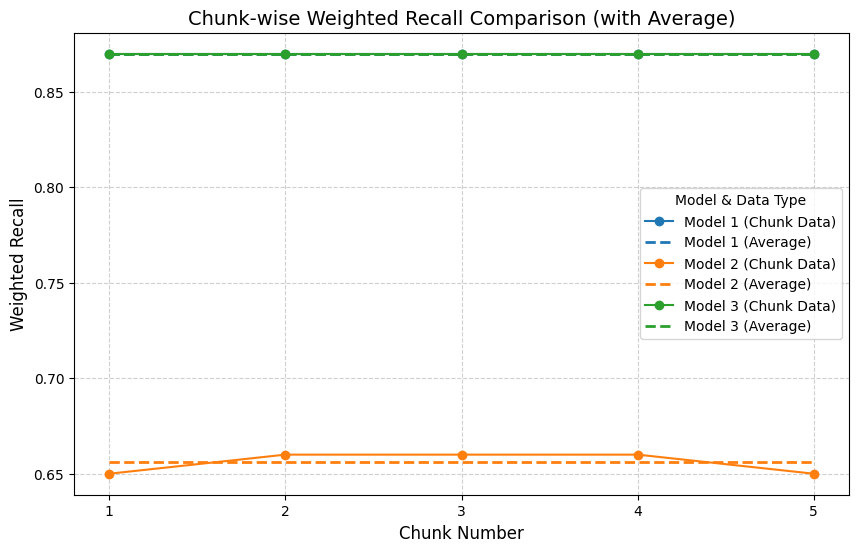

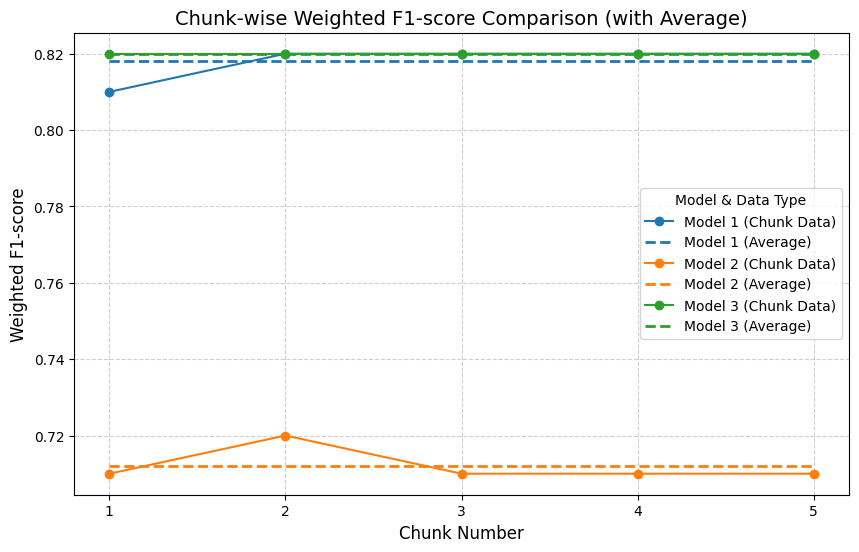

Displayed four graphs (Accuracy, Weighted Precision, Weighted Recall, Weighted F1-score) with average lines using plt.show().


In [84]:
data = {
    'Chunk': list(range(1, 6)) * 3,
    'Model': ['Model 1'] * 5 + ['Model 2'] * 5 + ['Model 3'] * 5,
    'Accuracy': [
        0.8720, 0.8730, 0.8722, 0.8738, 0.8727,
        0.6541, 0.6594, 0.6578, 0.6565, 0.6539,
        0.8727, 0.8717, 0.8720, 0.8720, 0.8724
    ],
    'Weighted Precision': [
        0.83, 0.83, 0.83, 0.83, 0.83,
        0.84, 0.84, 0.84, 0.84, 0.83,
        0.82, 0.81, 0.82, 0.82, 0.82
    ],
    'Weighted Recall': [
        0.87, 0.87, 0.87, 0.87, 0.87,
        0.65, 0.66, 0.66, 0.66, 0.65,
        0.87, 0.87, 0.87, 0.87, 0.87
    ],
    'Weighted F1-score': [
        0.81, 0.82, 0.82, 0.82, 0.82,
        0.71, 0.72, 0.71, 0.71, 0.71,
        0.82, 0.82, 0.82, 0.82, 0.82
    ]
}
df = pd.DataFrame(data)
average_metrics = df.groupby('Model').mean().drop(columns='Chunk')
metrics = ['Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1-score']
model_names = df['Model'].unique()
model_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_map = dict(zip(model_names, model_colors))
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for model in model_names:
        model_data = df[df['Model'] == model]
        plt.plot(model_data['Chunk'], model_data[metric], marker='o', label=f'{model} (Chunk Data)', color=color_map[model], zorder=3)
        avg_value = average_metrics.loc[model, metric]
        plt.plot([1, 5], [avg_value, avg_value], linestyle='--', color=color_map[model], label=f'{model} (Average)', linewidth=2, zorder=2)
    plt.title(f'Chunk-wise {metric} Comparison (with Average)', fontsize=14)
    plt.xlabel('Chunk Number', fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(df['Chunk'].unique())
    plt.grid(True, linestyle='--', alpha=0.6)
    handles, labels = plt.gca().get_legend_handles_labels()
    chunk_handles = [h for h, l in zip(handles, labels) if '(Chunk Data)' in l]
    avg_handles = [h for h, l in zip(handles, labels) if '(Average)' in l]
    chunk_labels = [l for l in labels if '(Chunk Data)' in l]
    avg_labels = [l for l in labels if '(Average)' in l]
    final_handles = []
    final_labels = []
    for model in model_names:
        final_labels.extend([l for l in chunk_labels if model in l])
        final_handles.extend([h for h, l in zip(chunk_handles, chunk_labels) if model in l])
        final_labels.extend([l for l in avg_labels if model in l])
        final_handles.extend([h for h, l in zip(avg_handles, avg_labels) if model in l])
    plt.legend(final_handles, final_labels, title='Model & Data Type', loc='best')
    plt.show()
print("Displayed four graphs (Accuracy, Weighted Precision, Weighted Recall, Weighted F1-score) with average lines using plt.show().")